# Visualize Ticker Features

This notebook loads and visualizes the features for a single ticker.

,date,open,high,low,close,volume,volume_prev,dividends,stock_splits,rsi,...,bb_lower,bb_middle,bb_pband,sma_20,sma_50,sma_100,sma_200,ema_100,ema_200,analyst_targets
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-12,2024-08-12,631.000000,639.000000,627.070007,633.140015,2331700,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2024-08-13,2024-08-13,638.559998,650.969971,635.500000,648.020020,2639600,2331700.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2024-08-14,2024-08-14,648.700012,663.570007,648.700012,661.679993,4014300,2639600.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2024-08-15,2024-08-15,668.489990,673.190002,659.799988,663.219971,3210200,4014300.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2024-08-16,2024-08-16,669.429993,680.229980,665.359985,674.070007,3511000,3210200.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-02,2025-06-02,1201.199951,1219.400024,1196.250000,1218.979980,2294200,4696800.0,0.0,0.0,68.695893,...,1112.005498,1173.179498,0.874346,1173.179498,1062.860598,1008.110298,894.766647,1021.395548,925.199918,None
2025-06-03,2025-06-03,1219.869995,1229.569946,1211.180054,1217.939941,2363800,2294200.0,0.0,0.0,68.322353,...,1116.001404,1177.373492,0.830496,1177.373492,1068.013597,1011.497797,897.547946,1025.287516,928.112754,None
2025-06-04,2025-06-04,1220.729980,1242.560059,1219.880005,1239.660034,2359400,2363800.0,0.0,0.0,71.774188,...,1118.257356,1182.471997,0.945288,1182.471997,1073.366998,1015.144398,900.430147,1029.532517,931.212727,None


Sector for NFLX: communication_services


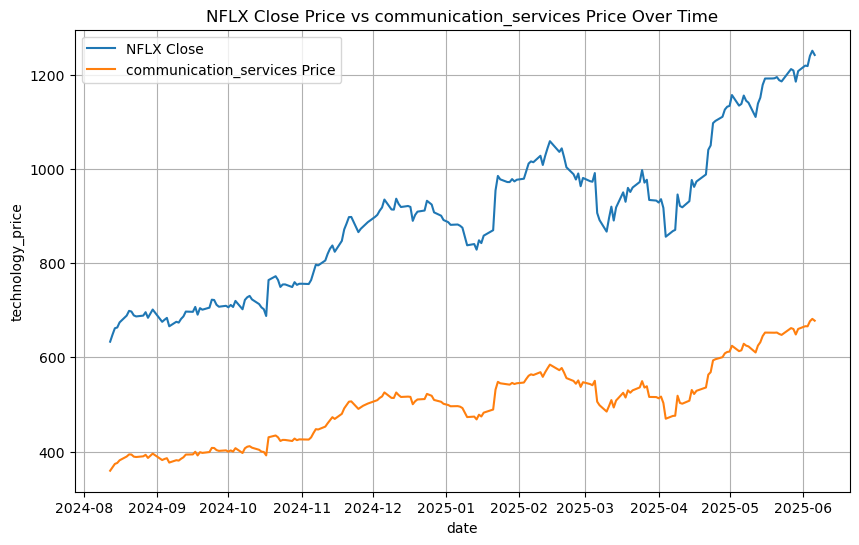

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the ticker's features from the Parquet file
ticker = 'NFLX'  # Change this to the desired ticker
df = pd.read_parquet(f'../data/ticker_features/{ticker}_features.parquet')

# Display the last few rows
display(df)

# Load the sector mapping from JSON
with open('../data/market_features/sector_mapping.json', 'r') as f:
    sector_dict = json.load(f)

# Get the sector for the ticker
sector = sector_dict.get(ticker, 'Unknown').lower().replace(' ', '_')
print(f"Sector for {ticker}: {sector}")

# Load the sector's Parquet file
sector_df = pd.read_parquet(f'../data/market_features/sectors/{sector}.parquet')

# Plot the ticker's 'Close' price over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label=f'{ticker} Close')

# Overlay the sector's 'price' data
plt.plot(sector_df.index, sector_df[sector.lower() + '_price'], label=f'{sector} Price')

plt.title(f'{ticker} Close Price vs {sector} Price Over Time')
plt.xlabel('date')
plt.ylabel('technology_price')
plt.legend()
plt.grid(True)
plt.show()

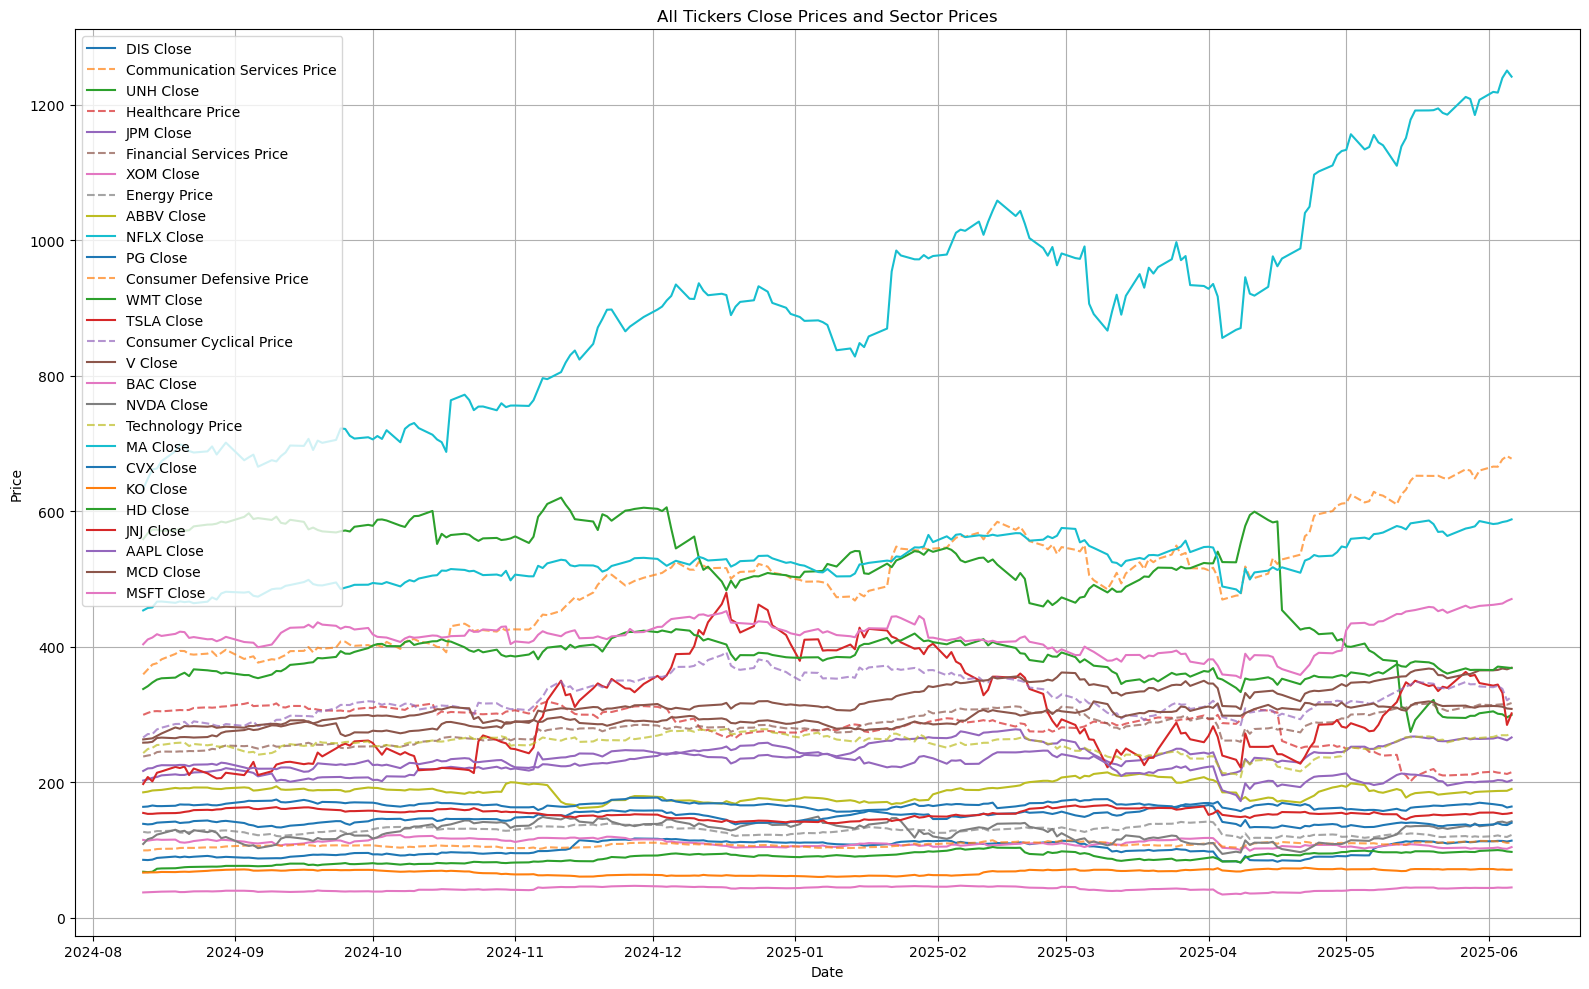

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

# Load sector mapping
with open('../data/market_features/sector_mapping.json', 'r') as f:
    sector_dict = json.load(f)

plt.figure(figsize=(16, 10))
sector_lines = {}

# Get all parquet files from ticker_features directory
ticker_files = [f for f in os.listdir('../data/ticker_features') if f.endswith('_features.parquet')]

for file in ticker_files:
    ticker = file.split('_')[0]
    try:
        df = pd.read_parquet(f'../data/ticker_features/{file}')
        plt.plot(df.index, df['close'], label=f'{ticker} Close')
        sector = sector_dict.get(ticker, None)
        if sector and sector not in sector_lines:
            sector_file = f'../data/market_features/sectors/{sector.lower().replace(" ", "_")}.parquet'
            sector_df = pd.read_parquet(sector_file)
            sector_col = sector.lower().replace(" ", "_") + '_price'
            if sector_col in sector_df.columns:
                plt.plot(sector_df.index, sector_df[sector_col], label=f'{sector} Price', linestyle='--', alpha=0.7)
                sector_lines[sector] = True
    except Exception as e:
        print(f"Error loading data for {ticker}: {e}")

plt.title('All Tickers Close Prices and Sector Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()